# Imports

In [168]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

from sklearn.neural_network import MLPRegressor

# Helper Functions

In [169]:
def loadImages(folder, limit=None):
    # Make a list of lists of the low res frames and high res frames
    # For each image also relativize the pixel values to be between 0 and 1 (its bw anyways)

    frames = []

    # Iterate through all the files in the folder
    for i, filename in enumerate(sorted(os.listdir(folder))):
        # Check if the limit has been reached
        if limit is not None and i >= limit:
            break

        # Load the image
        img = plt.imread(folder + "/" + filename)
        # Relativize the pixel values
        img = img / 255
        # Append the image to the list
        frames.append(img)

    return frames


def loadImagesRGB(folder, limit=None):
    # Make a list of lists of the low res frames and high res frames
    # For each image also relativize the pixel values to be between 0 and 1 (it's RGB)

    frames = []

    # Iterate through all the files in the folder
    for i, filename in enumerate(sorted(os.listdir(folder))):
        # Check if the limit has been reached
        if limit is not None and i >= limit:
            break

        # Load the image
        img = plt.imread(folder + "/" + filename)
        # Relativize the pixel values
        img = img / 255
        # Append the image to the list
        frames.append(img)

    return frames


# Data Preparation

In [170]:
lowResX, lowResY = 64, 64
highResX, highResY = 128, 128

lowResFramesFolder = f"minecraftDataColor/data{lowResX}x{lowResY}"
highResFramesFolder = f"minecraftDataColor/data{highResX}x{highResY}"

# Limit how many frames if needed
limit = 10000000

lowResFrames = loadImages(lowResFramesFolder, limit=limit)
highResFrames = loadImages(highResFramesFolder, limit=limit)


# Split the data into X and y
X, y = lowResFrames, highResFrames

# Flatten the frames
X = np.array([frame.flatten() for frame in X])
y = np.array([frame.flatten() for frame in y])

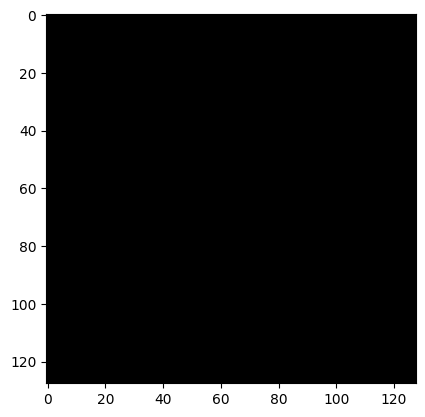

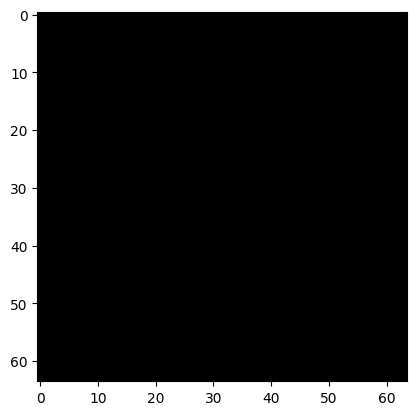

(17870, 12288)


In [171]:
plt.imshow(highResFrames[0], cmap='gray')
plt.show()
plt.imshow(lowResFrames[0], cmap='gray')
plt.show()

print(X.shape)

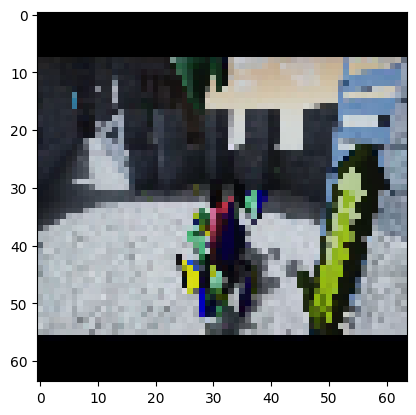

In [172]:
# Assuming X[0] is a 1D array representing the first frame
frame = X[32]

# Reshape the 1D array into a 3D array
image = frame.reshape(lowResY, lowResX, 3)

# Display the image
plt.imshow(image*255)
plt.show()

In [173]:
X[0]

array([1.5378702e-05, 1.5378702e-05, 1.5378702e-05, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

# Training

In [177]:
model = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100), verbose=True, tol=0.00000001)

model.fit(X, y)

Iteration 1, loss = 0.00020551
Iteration 2, loss = 0.00015237
Iteration 3, loss = 0.00013960
Iteration 4, loss = 0.00013847
Iteration 5, loss = 0.00013454
Iteration 6, loss = 0.00013328
Iteration 7, loss = 0.00013258
Iteration 8, loss = 0.00012963
Iteration 9, loss = 0.00012692
Iteration 10, loss = 0.00012506
Iteration 11, loss = 0.00012553
Iteration 12, loss = 0.00012555
Iteration 13, loss = 0.00012469
Iteration 14, loss = 0.00012386
Iteration 15, loss = 0.00012383
Iteration 16, loss = 0.00012311
Iteration 17, loss = 0.00012274
Iteration 18, loss = 0.00012220
Iteration 19, loss = 0.00012236
Iteration 20, loss = 0.00012316
Iteration 21, loss = 0.00012316
Iteration 22, loss = 0.00012336
Iteration 23, loss = 0.00012460
Iteration 24, loss = 0.00012529
Iteration 25, loss = 0.00012451
Iteration 26, loss = 0.00012305
Iteration 27, loss = 0.00012160
Iteration 28, loss = 0.00012426
Iteration 29, loss = 0.00012183
Iteration 30, loss = 0.00012019
Iteration 31, loss = 0.00011909


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100), tol=1e-08,
             verbose=True)

# Testing Predictions

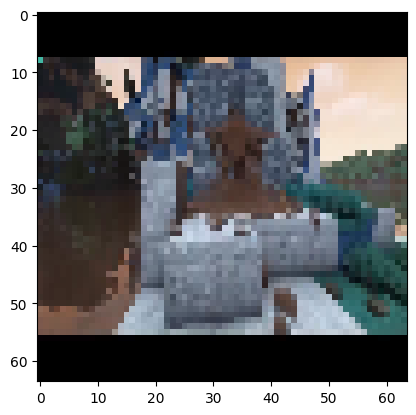

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


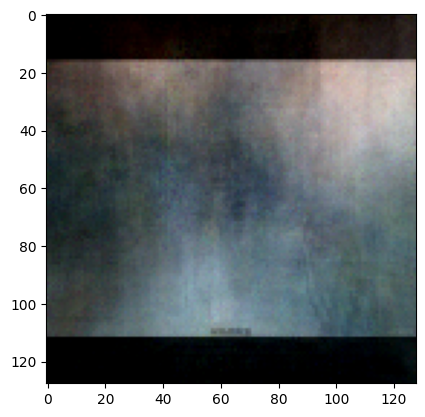

In [183]:
# Make random noise of size lowResX x lowResY px
# noise = np.random.rand(lowResX * lowResY * 3)
noise = X[545]

# Predict the high res frame from the low res frame
highResFramePred = model.predict([noise])

# Reshape the high res frame to be a highResX x highResY image
highResFramePred = highResFramePred.reshape(highResX, highResY, 3)

# Show the low res frame
plt.imshow(noise.reshape(lowResX, lowResY, 3)*255)
plt.show()

# Show the high res frame
plt.imshow(highResFramePred*255)
plt.show()